<a href="https://colab.research.google.com/github/maxashoka3/Machine-learing-proj/blob/master/50_Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Objective to find the profit made by a startup on the basis of expenses incurred  
#Self_Practise

In [62]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [8]:
# Importing the dataset
df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Copy of 50_Startups.csv')

In [9]:
len(df)

50

In [10]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
df.shape

(50, 5)

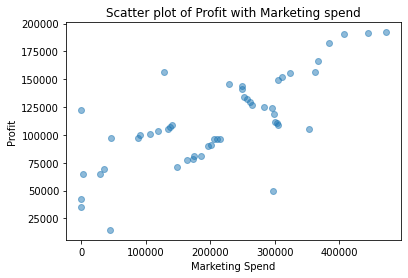

In [13]:
plt.scatter(df['Marketing Spend'], df['Profit'], alpha = 0.5)
plt.title('Scatter plot of Profit with Marketing spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

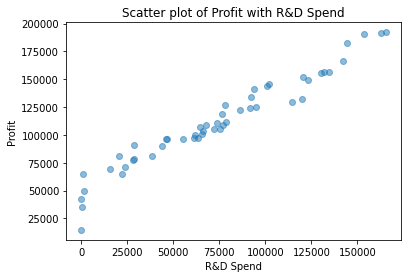

In [14]:
plt.scatter(df['R&D Spend'], df['Profit'], alpha = 0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

So profit and R&D Spend are highly positively corelated

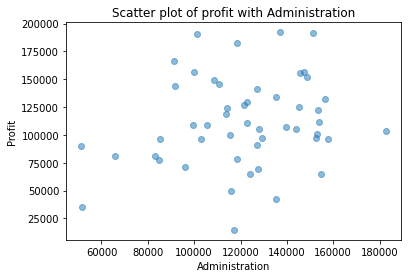

In [15]:
plt.scatter(df['Administration'],df['Profit'], alpha =0.5)
plt.title('Scatter plot of profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

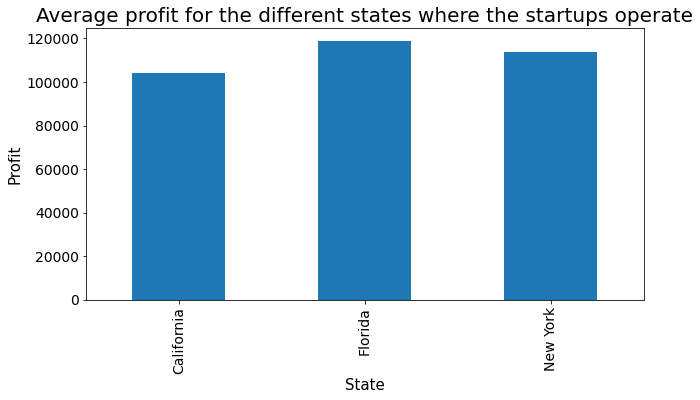

In [16]:
#Create the figure object
ax = df.groupby(['State'])['Profit'].mean().plot.bar(figsize = (10,5),
                                                     fontsize = 14)
#Set the title
ax.set_title('Average profit for the different states where the startups operate',
             fontsize =20)
#set x and y labels
ax.set_xlabel("State",fontsize = 15)
ax.set_ylabel('Profit',fontsize =15)

In [18]:
#total states with value count
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [31]:
#dummification of the categorical variable of state
df['California'] = np.where(df['State'] == 'California',1,0)
df['New York'] = np.where(df['State'] == 'New York', 1,0)
df['Florida'] = np.where(df['State'] == 'Florida',1,0)

# Droping the original column State from the dataframe
df.drop(columns=['State'],axis = 1,inplace = True)

In [32]:
df.head()


,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [35]:
#Now Creating dependent and Independent variable
dependent_variable = 'Profit'
independent_variables = list(set(df.columns.tolist())-{dependent_variable})

In [36]:
independent_variables

['Marketing Spend',
 'R&D Spend',
 'New York',
 'Administration',
 'Florida',
 'California']

In [37]:
#Create the data of independent variables
X = df[independent_variables].values
# Create the dependent variable data
y = df[dependent_variable].values

In [45]:
#Spliting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state= 0)

In [46]:
#Lets Transform the data 
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train[:10]

array([[0.45494286, 0.33561668, 0.        , 0.48655174, 1.        ,
        0.        ],
       [0.43561799, 0.2782839 , 1.        , 0.3173015 , 0.        ,
        0.        ],
       [0.28413435, 0.45557444, 0.        , 0.87258866, 1.        ,
        0.        ],
       [0.44680961, 0.2807759 , 0.        , 1.        , 0.        ,
        1.        ],
       [0.62511553, 0.55488118, 0.        , 0.59103645, 1.        ,
        0.        ],
       [0.68649342, 0.7880179 , 0.        , 0.88568959, 1.        ,
        0.        ],
       [0.54370828, 0.72539353, 0.        , 0.98922572, 1.        ,
        0.        ],
       [0.0040356 , 0.0060492 , 1.        , 0.6847981 , 0.        ,
        0.        ],
       [0.        , 0.00327821, 1.        , 0.00432296, 0.        ,
        0.        ],
       [0.22709197, 0.39676926, 1.        , 0.95618996, 0.        ,
        0.        ]])

In [49]:
# Fiting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [50]:
regressor.intercept_

44153.95466784861

In [52]:
regressor.coef_

array([ 1.72720281e+04,  1.27892182e+05,  7.86007422e+02,  3.49927567e+03,
       -8.72645791e+02,  8.66383692e+01])

In [53]:
#Predicting
y_pred_train = regressor.predict(X_train)

In [54]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [55]:
#predicting the Test set results
y_pred = regressor.predict(X_test
                           )

In [56]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [57]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [58]:
#MSE
mean_squared_error(y_test,y_pred)

83502864.03257732

In [59]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [60]:
# Test performance
math.sqrt(mean_squared_error(y_test,y_pred))

9137.990152794942

In [63]:
r2_score(y_train,y_pred_train)

0.9501847627493607

In [64]:
r2_score(y_test, y_pred)

0.9347068473282425